In [7]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [11]:
encoding_dim=64

In [13]:


# Define the input layer
input_img = Input(shape=(784,))

# Create the encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Create the decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Create the encoder model
encoder = Model(input_img, encoded)

# Create the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


In this corrected code, both the encoder and decoder parts are included in the autoencoder. The encoder maps the input data to a lower-dimensional representation, and the decoder maps the lower-dimensional representation back to the original input data. This is a standard autoencoder architecture.

In [15]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

# *load minist dataset*

In [17]:
(x_train, _),(x_test, _)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(f'x_train shape={x_train.shape}')
print(f'x_test shape={x_test.shape}')

x_train shape=(60000, 784)
x_test shape=(10000, 784)


## fit data

In [19]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6726 - val_loss: 0.6720
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6719 - val_loss: 0.6712
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6712 - val_loss: 0.6705
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6704 - val_loss: 0.6697
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6697 - val_loss: 0.6689
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6689 - val_loss: 0.6681
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6680 - val_loss: 0.6672
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6672 - val_loss: 0.6664
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6663 - val_loss: 0.6655
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6654 - val_lo

In [21]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)


313/313 [==============================] - 1s 2ms/step


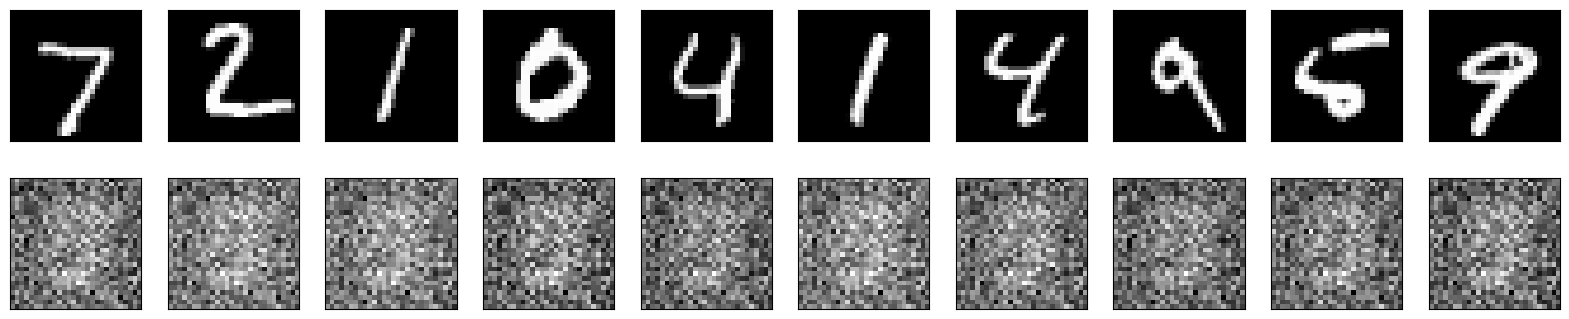

In [23]:
n=10
plt.figure(figsize=(20,4))

for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()